# Overall Objectives with Dataset:

- Explore the dataset and visualise interesting outcomes
- Create a linear regression model to predict the following: Price of used cars
- Generate business insights based on findings

Read the file ReadME for a more indepth explination and insight into the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Mathmatical cCmputing
import math
# Used to build Linear Model (Statistical Analysis and Modeling)
import statsmodels.stats.api as sms
# Suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv("used_cars_data.csv")

In [6]:
db = data.copy()

np.random.seed(1)

db.sample(n=10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36 Lakh,8.20


## Exploratory data analysis

Initial exploration into the dataset: Dataset gives insight into the different components of the cars that affect their price level. It also gives a geographical component that is interesting to see how it affects the pricing range of the cars. Some key points to keep in mind for modifying the data.
- Some points for the new price are missing, there will need to be processing to evaluate the data correctly
- S.No is a repeat of the identification number, it can be dropped
- The columns Mileage, Engine, and Power need to be modified to extract numerical data that can be used in analysis

In [7]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [9]:
db.duplicated().sum()

0

The number of integer based columns is 3, there are 2 float based columns, and there are 9 object based columns. 4 of these object based columns need to be modified to be able to get numerical field so that a more profound analysis can be made. There are no duplicated values in the dataset.

## Process Data

The columns Mileage, Power, Engine and New_Price need to be processed to be able to extract numerical data from them to accurately analyse the data.

- Mileage:

There are two units of measure being used for the Mileage of the car kmpl and km/kg, it will be interesting to find out the different reasons for this and later on see how it can be used to produce more accurate models.

In [10]:
db_mileage = db["Mileage"].str.split(" ",expand = True)
db_mileage.head()

,0,1
0,26.6,km/kg
1,19.67,kmpl
2,18.2,kmpl
3,20.77,kmpl
4,15.2,kmpl


In [11]:
db_mileage[1].value_counts()

kmpl     7177
km/kg      74
Name: 1, dtype: int64

In [12]:
db["mileage_per_fuel"]=db_mileage[0].astype(float)
db["mileage_unit"]=db_mileage[1]

db.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,mileage_per_fuel,mileage_unit
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.60,km/kg
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.20,kmpl
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,kmpl
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.20,kmpl


In [13]:
db.groupby(by=["Fuel_Type", "mileage_unit"]).size()

Fuel_Type  mileage_unit
CNG        km/kg             62
Diesel     kmpl            3852
LPG        km/kg             12
Petrol     kmpl            3325
dtype: int64

The different units per mileage used correspond to a specific fuel types used, it's not just either-or. km/kg is used by CNG and LPG fuel types and kmpl is used by Diesel and Petrol. This can be used to make a more accurate analysis of the data.


- Power:

It is important to extract the numerical component of the column

In [15]:
db_power = db["Power"].str.split(" ", expand=True)
db_power[1].value_counts()

bhp    7207
Name: 1, dtype: int64

In [17]:
# We got an error when creating a new column for power values as float, error type can not convert null into float type.

db_power[db_power[0] == "null"]

,0,1
76,null,bhp
79,null,bhp
89,null,bhp
120,null,bhp
143,null,bhp
227,null,bhp
245,null,bhp
262,null,bhp
307,null,bhp
308,null,bhp


In [22]:
# Creat a function used to convert the power column into a float type

def numerical_power(power_val):
    """
    This function takes in a string representing he maximum power of the engine in bhp
    and converts it to a number. For example, '126.2 bhp' becomes 126.2
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan
    """
    if isinstance(power_val, str):
        if power_val.startswith("null"):
            return np.nan
        elif power_val.endswith("bhp"):
            return float(power_val.replace(" bhp", ""))
    else:
        return np.nan

In [23]:
db["Power_num"] = db["Power"].apply(numerical_power)

db.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,mileage_per_fuel,mileage_unit,Power_num
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.60,km/kg,58.16
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl,126.20
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.20,kmpl,88.70
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,kmpl,88.76
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.20,kmpl,140.80


The numerical value of the Power column has been extracted successfuly and given it's own column.

- Engine:

Similarly the numerical value of the column has to be extracted for proper analysis. 

In [24]:
db_engine = db["Engine"].str.split(" ", expand=True)
db_engine.head()

,0,1
0,998,CC
1,1582,CC
2,1199,CC
3,1248,CC
4,1968,CC


In [25]:
db_engine[1].value_counts()

CC    7207
Name: 1, dtype: int64

In [28]:
db["engine_num"] = db_engine[0].astype(float)
db.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,mileage_per_fuel,mileage_unit,Power_num,engine_num
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.60,km/kg,58.16,998.0
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl,126.20,1582.0
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.20,kmpl,88.70,1199.0
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,kmpl,88.76,1248.0
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.20,kmpl,140.80,1968.0



- New_Price

It will be important to extract the numerical value of the column values and equivalate the currency rate (1 Cr = 100 Lakhs).

In [29]:
db_new_price = db["New_Price"].str.split(" ", expand=True)
db_new_price.head()

,0,1
0,NaN,NaN
1,NaN,NaN
2,8.61,Lakh
3,NaN,NaN
4,NaN,NaN


In [30]:
db_new_price[1].value_counts()

Lakh    986
Cr       20
Name: 1, dtype: int64

In [31]:
def new_price_equal (new_price_value):
    """
    A function that takes the string values and converts it to numerical value; 
    If already numerical value it is probably an Nan, it returns an nan value
    """
    if isinstance(new_price_value , str):
        multiplier = 1
        if new_price_value.endswith("Lakh"):
            multiplier = 1
        elif new_price_value.endswith("Cr"):
            multiplier = 100
        return float(new_price_value.replace(" Lakh", "").replace(" Cr", "")) * multiplier
    else:
        return np.nan

In [32]:
db["new_price_num"] = db["New_Price"].apply(new_price_equal)
db.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,mileage_per_fuel,mileage_unit,Power_num,engine_num,new_price_num
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.60,km/kg,58.16,998.0,NaN
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,kmpl,126.20,1582.0,NaN
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.20,kmpl,88.70,1199.0,8.61
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,kmpl,88.76,1248.0,NaN
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.20,kmpl,140.80,1968.0,NaN


## Feature Extraction 

It will be best to split the name column into the brand name and the model to have more accurate predictions. 

In [33]:
db["Brand"] = db["Name"].apply(lambda x: x.split(" ")[0].lower())
db["Brand"].value_counts()

maruti           1444
hyundai          1340
honda             743
toyota            507
mercedes-benz     380
volkswagen        374
ford              351
mahindra          331
bmw               312
audi              285
tata              228
skoda             202
renault           170
chevrolet         151
nissan            117
land               67
jaguar             48
fiat               38
mitsubishi         36
mini               31
volvo              28
porsche            19
jeep               19
datsun             17
isuzu               5
force               3
bentley             2
smart               1
ambassador          1
lamborghini         1
hindustan           1
opelcorsa           1
Name: Brand, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Brand'>

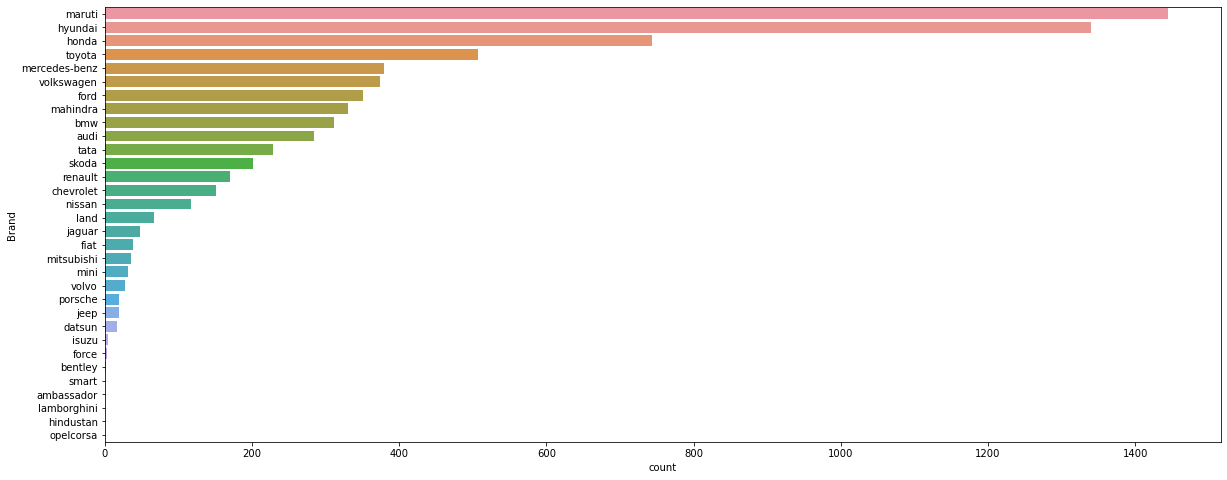

In [35]:
plt.figure(figsize=(20,8))
sns.countplot(y="Brand", data=db, order=db["Brand"].value_counts().index)

In [36]:
db["Model"] = db["Name"].apply(lambda x: x.split(" ")[1].lower())
db["Model"].value_counts()

swift      418
city       318
i20        303
innova     203
verna      200
          ... 
fortwo       1
redi         1
e            1
mustang      1
1.4gsi       1
Name: Model, Length: 218, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Model'>

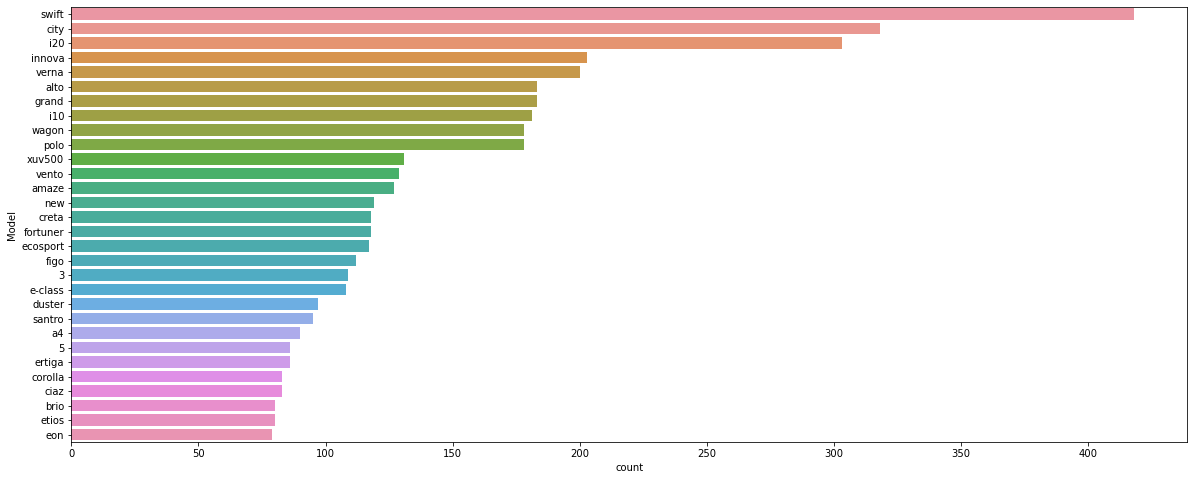

In [40]:
plt.figure(figsize=(20,8))
sns.countplot(y="Model", data=db, order=db["Model"].value_counts().index[:30])

Based on the findings of the distribution of the cars in the data set (Luxury to Budget options) the cars can be binned into the following 3 categories for the new variables. 

- Budget
- Mid Range
- Luxury

In [41]:
db.groupby(["Brand"])["Price"].mean().sort_values(ascending=False)

Brand
lamborghini      120.000000
bentley           59.000000
porsche           48.348333
land              39.259500
jaguar            37.632250
mini              26.896923
mercedes-benz     26.809874
audi              25.537712
bmw               25.243146
volvo             18.802857
jeep              18.718667
isuzu             14.696667
toyota            11.580024
mitsubishi        11.058889
force              9.333333
mahindra           8.045919
skoda              7.559075
ford               6.889400
renault            5.799034
honda              5.411743
hyundai            5.343433
volkswagen         5.307270
nissan             4.738352
maruti             4.517267
tata               3.562849
fiat               3.269286
datsun             3.049231
chevrolet          3.044463
smart              3.000000
ambassador         1.350000
hindustan               NaN
opelcorsa               NaN
Name: Price, dtype: float64

In [42]:
db.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.000,3626.00,5439.0000,7252.00
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6500000.00
Seats,7200.0,5.279722,0.811660,0.00,5.000,5.00,5.0000,10.00
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,160.00
mileage_per_fuel,7251.0,18.141580,4.562197,0.00,15.170,18.16,21.1000,33.54
Power_num,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,616.00
engine_num,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5998.00
new_price_num,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,375.00


- As previously described S.NO. holds no purpose aside from being an ID, it will be removed